- Check: https://online.stat.psu.edu/stat501/lesson/1/1.2

X: height (inches)

Y: weight (pounds)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = [63, 64, 66, 69, 69, 71, 71, 72, 73, 75]
x = np.array(x)

y = [127, 121, 142, 157, 162, 156, 169, 165, 181, 208]
y = np.array(y)

data = pd.DataFrame({'xi': x, 'yi': y})
data

,xi,yi
0,63,127
1,64,121
2,66,142
3,69,157
4,69,162
5,71,156
6,71,169
7,72,165
8,73,181
9,75,208


Text(24.500000000000007, 0.5, 'Weight (pounds)')

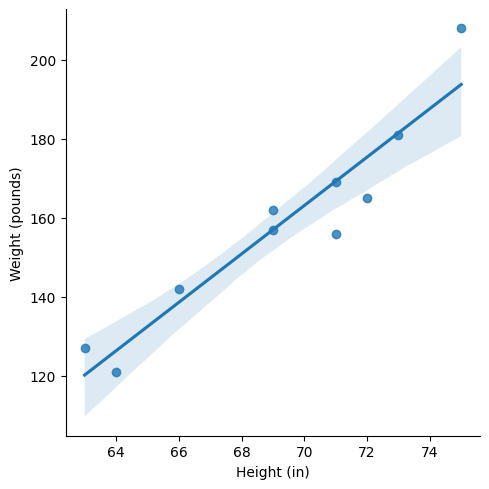

In [ ]:
sns.lmplot(data=data, x='xi', y="yi")
plt.xlabel("Height (in)")
plt.ylabel("Weight (pounds)")

### Linear Model:

$$Y = a*X + b$$
$$Weight = a*Height + b$$

(59.738595220854634, 5.9238233164373755, 7.72907466782762)

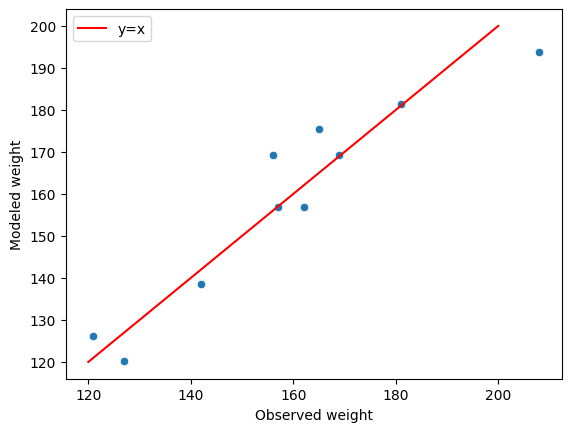

In [ ]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression().fit(x.reshape(-1, 1), y)

a, b = l_reg.coef_[0], l_reg.intercept_

# The line is our model 
y_model = a*x + b

sns.scatterplot(x=y, y=y_model)
plt.xlabel("Observed weight")
plt.ylabel("Modeled weight")

plt.plot(range(120,201), range(120,201), 'r', label="y=x")
plt.legend()

# MSE: mean squared error, MAE: mean absoulte error, RMSE: Root mean square error
((y - y_model)**2).mean(), (np.abs(y - y_model)).mean(), np.sqrt(((y - y_model)**2).mean())

In [ ]:
# Scale the data (min-max scaling, [0,1])
x_scaled = (x - x.min()) / (x.max() - x.min())
pd.DataFrame({'x': x, 'x_scaled': x_scaled})

,x,x_scaled
0,63,0.000000
1,64,0.083333
2,66,0.250000
3,69,0.500000
4,69,0.500000
5,71,0.666667
6,71,0.666667
7,72,0.750000
8,73,0.833333
9,75,1.000000


In [ ]:
# Step 0: import learner (classifier or regression)
from sklearn.neural_network import MLPRegressor

#max_iter=1000, hidden_layer_sizes=(1000,)
# Step 1: Define the learner (and its hyper parameters)
mlpreg = MLPRegressor(max_iter=10000, hidden_layer_sizes=(1000,))
# Step 2: Fit the model (train the learner)
mlpreg.fit(x_scaled.reshape(-1,1), y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(1000,), max_iter=10000)

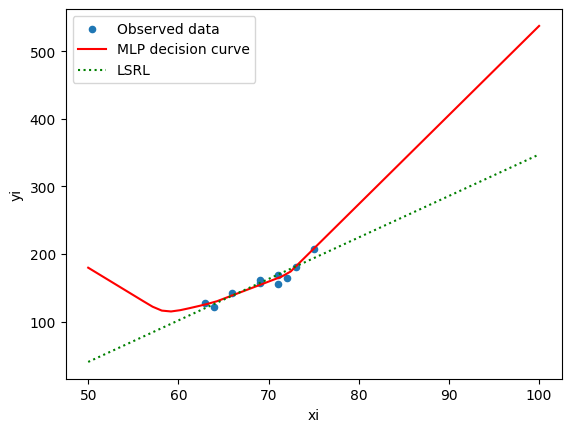

In [ ]:
# Step 3: You should evaluate your model (test and validation)
x_mlp = np.linspace(x.min(), x.max())
x_mlp = np.linspace(50, 100)  # evaluate the MLP from 50 to 100 inches in height
x_mlp_scaled = (x_mlp - x.min()) / (x.max() - x.min())
# Step 4 - Final goal: predict
y_mlp = mlpreg.predict(x_mlp_scaled.reshape(-1,1))
y_lr = a*x_mlp + b  # best fitting line LSRL (Least Squares Regression Line)
data.plot.scatter('xi', 'yi', label="Observed data")
plt.plot(x_mlp, y_mlp, 'r', label="MLP decision curve")
plt.plot(x_mlp, y_lr, ':g', label='LSRL')
plt.legend()

In [ ]:
# MLP model
# MSE: mean squared error, MAE: mean absoulte error, RMSE: Root mean square error
y_model_mlp = mlpreg.predict(x_scaled.reshape(-1,1))
((y - y_model_mlp)**2).mean(), (np.abs(y - y_model_mlp)).mean(), np.sqrt(((y - y_model_mlp)**2).mean())

(25.2179337121591, 4.118063910078616, 5.021746082007642)

In [ ]:
# BEST fitting line
# MSE: mean squared error, MAE: mean absoulte error, RMSE: Root mean square error
((y - y_model)**2).mean(), (np.abs(y - y_model)).mean(), np.sqrt(((y - y_model)**2).mean())

(59.738595220854634, 5.9238233164373755, 7.72907466782762)

In [ ]:
error_data = pd.DataFrame({'y_mlp': mlpreg.predict(x_scaled.reshape(-1,1)), 'y_obs': y})
error_data['abs_error'] = np.abs(error_data.y_mlp - error_data.y_obs)
error_data['sq_error'] = (error_data.y_mlp - error_data.y_obs)**2

error_data


,y_mlp,y_obs,abs_error,sq_error
0,111.109522,127,15.890478,252.507282
1,118.534619,121,2.465381,6.078104
2,133.384844,142,8.615156,74.220906
3,155.660498,157,1.339502,1.794265
4,155.660498,162,6.339502,40.189284
5,170.510934,156,14.510934,210.567205
6,170.510934,169,1.510934,2.282922
7,177.936179,165,12.936179,167.344730
8,185.370012,181,4.370012,19.097002
9,200.237677,208,7.762323,60.253663


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>